# This is just for development process usess and may contain any code, fololow example folder for examples of use


In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np

import sympy as sp
import re

sys.path.append("../run/")
import BondGraph as bg


In [2]:
import networkx as nx

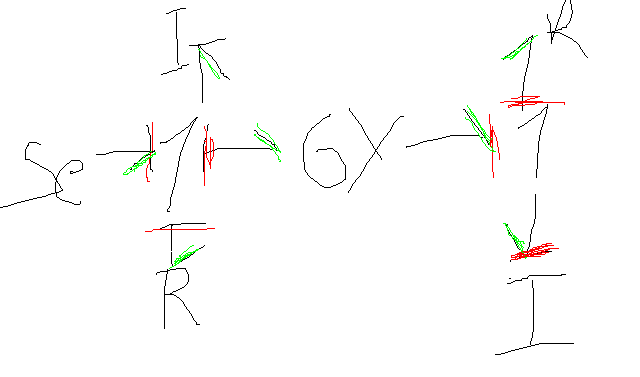

In [3]:
# Create empty model
model = bg.BondGraph(Name ='My Bond graph model of motor')

In [4]:
#Create some elements
GY_1 = bg.BGelement('GY')

SE_1 = bg.BGelement('SE')
# C_1 = bg.BGelement('C')
R_1 = bg.BGelement('R', Position=[3,4])
R_2 = bg.BGelement('R', Position=[3,4])
I_1 = bg.BGelement('I')
I_2 = bg.BGelement('I')

OneJ_1 = bg.BGelement('1')
OneJ_2 = bg.BGelement('1')
# OneJ_3 = bg.BGelement('1')
# OneJ_4 = bg.BGelement('1')
# ZeroJ_1 = bg.BGelement('0')
# SF_1 = bg.BGelement('SF')

# print(C)

In [5]:
# Add the created elements to the model
model.addElement(OneJ_1)
model.addElement(OneJ_2)
# model.addElement(C_1)
model.addElement(R_1)
model.addElement(R_2)
model.addElement(I_1)
model.addElement(I_2)
model.addElement(SE_1)
# model.addElement(SF_1)

model.addElement(GY_1)
# print(model)

In [6]:
# add a connections between elements in model
model.connect(SE_1, OneJ_1)
model.connect(I_1, OneJ_1)
model.connect(R_1, OneJ_1)
model.connect(GY_1, OneJ_1)
model.connect(GY_1, OneJ_2)
model.connect(OneJ_2, I_2)
# model.connect(OneJ_2, I_3)
# model.connect(ZeroJ_1, OneJ_4)
model.connect(R_2, OneJ_2)
# model.connect(R_1, OneJ_2)
# model.connect(OneJ_4, SF_1)

In [7]:
bg.show_ports_state(model)

Element name:  1_6
++ port_id: 1 |  arrow:  None |  causality:  None
++ port_id: 3 |  arrow:  None |  causality:  None
++ port_id: 5 |  arrow:  None |  causality:  None
++ port_id: 7 |  arrow:  None |  causality:  None
Element name:  1_7
++ port_id: 9 |  arrow:  None |  causality:  None
++ port_id: 10 |  arrow:  None |  causality:  None
++ port_id: 13 |  arrow:  None |  causality:  None
Element name:  R_2
++ port_id: 4 |  arrow:  None |  causality:  None
Element name:  R_3
++ port_id: 12 |  arrow:  None |  causality:  None
Element name:  I_4
++ port_id: 2 |  arrow:  None |  causality:  None
Element name:  I_5
++ port_id: 11 |  arrow:  None |  causality:  None
Element name:  SE_1
++ port_id: 0 |  arrow:  None |  causality:  None
Element name:  GY_0
++ port_id: 6 |  arrow:  None |  causality:  None
++ port_id: 8 |  arrow:  None |  causality:  None


In [8]:
model.assign_sources_ports()

In [9]:
model.update_bondsport_status()

In [10]:
model.assign_ports_for_CRI_elemts()

In [11]:
model.assign_ports_TF_GY()

In [12]:
model.apply_one_zero_junction_rule()

In [13]:
model.applyRules()

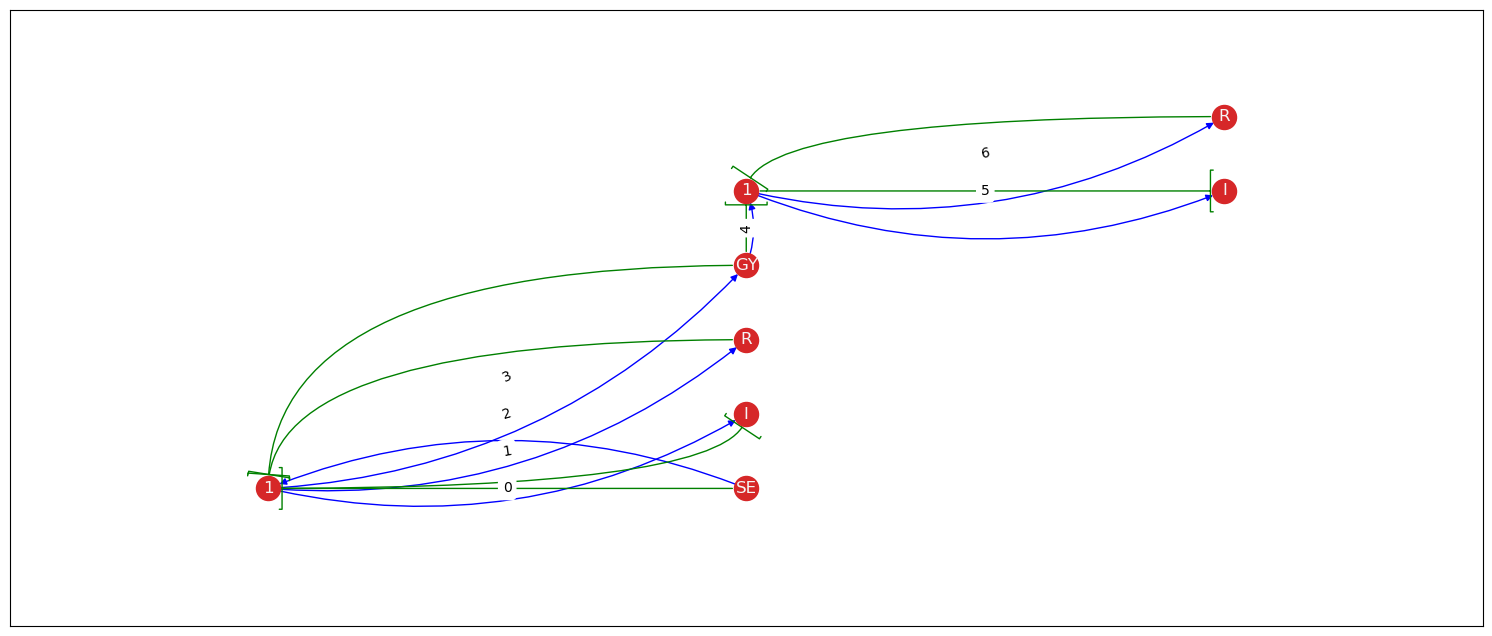

In [14]:
# Set positions automatically for drawing
# some automatically done works on model
model.render()
model.draw()

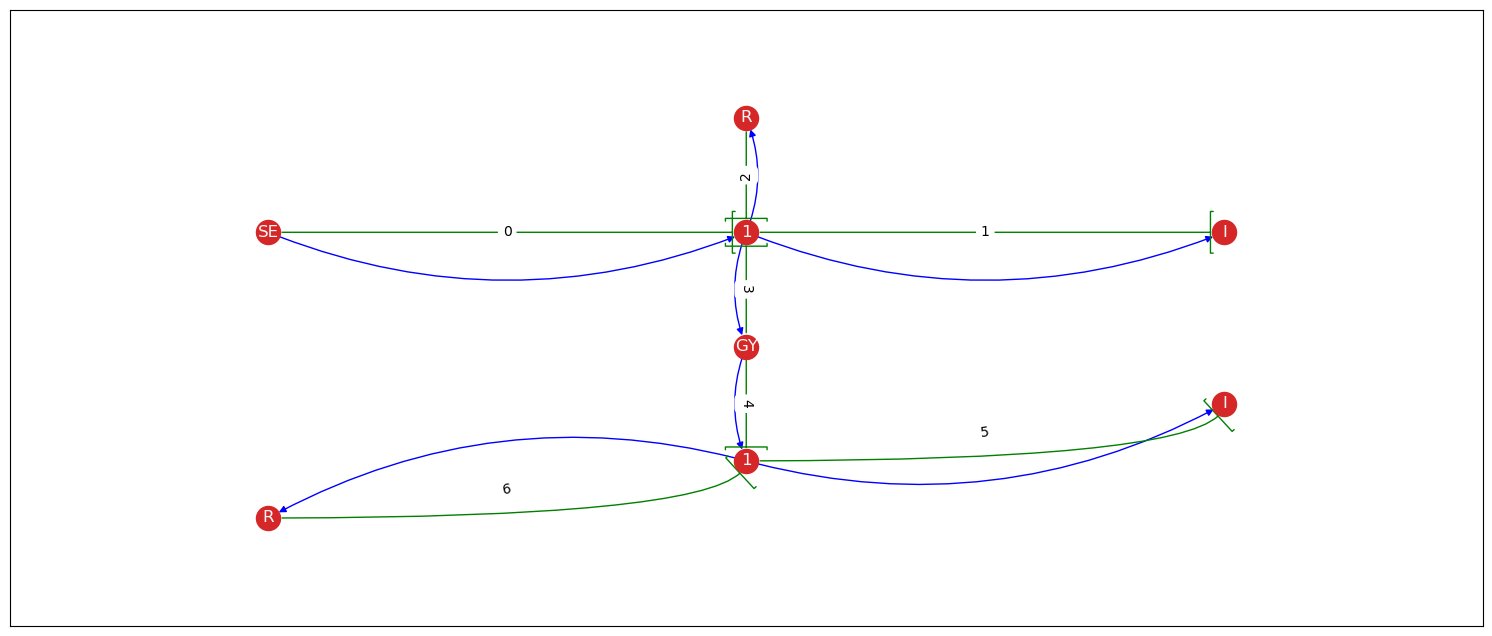

In [15]:
# set positions manually
SE_1.setPosition([1,7])
OneJ_1.setPosition([2,7])
I_1.setPosition([3,7])
R_1.setPosition([2,9])

GY_1.setPosition([2,5])

OneJ_2.setPosition([2,3])
# OneJ_3.setPosition([4,2])
# ZeroJ_1.setPosition([3,2])
I_2.setPosition([3,4])

R_2.setPosition([1,2])
# SF_1.setPosition([4,0])
# OneJ_4.setPosition([3,0])

# draw
model.draw()

In [16]:
# for element in model.getElementsList():
#     ports = element.getPorts()
#     # print(element.getType(), ports)
#     if element.getType() == '1':
#         count_causal_ports = 0
#         for port in element.getPorts():
#             if port.getCausality() == 'Causal':
#                 count_causal_ports += 1
#         if count_causal_ports > 1:
#             print(f'Element id={element.getId()} ERROR 11----- ONLY ONE CAUSAL ALLOWED FOR 1 JUNCTION -----')
#     if element.getType() == '0':
#         count_uncausal_ports = 0
#         for port in element.getPorts():
#             if port.getCausality() == 'Uncausal':
#                 count_uncausal_ports += 1
#         if count_uncausal_ports > 1:
#             print(f'Element id={element.getId()} ERROR 12----- ONLY ONE Uncausal ALLOWED FOR 0 JUNCTION -----')


In [17]:
model.verifyRules()

In [18]:
bg.show_ports_state(model)

Element name:  1_6
++ port_id: 1 |  arrow:  Input |  causality:  Causal
++ port_id: 3 |  arrow:  Output |  causality:  Uncausal
++ port_id: 5 |  arrow:  Output |  causality:  Causal
++ port_id: 7 |  arrow:  Output |  causality:  Causal
Element name:  1_7
++ port_id: 9 |  arrow:  Input |  causality:  Causal
++ port_id: 10 |  arrow:  Output |  causality:  Uncausal
++ port_id: 13 |  arrow:  Output |  causality:  Causal
Element name:  R_2
++ port_id: 4 |  arrow:  Input |  causality:  Uncausal
Element name:  R_3
++ port_id: 12 |  arrow:  Input |  causality:  Uncausal
Element name:  I_4
++ port_id: 2 |  arrow:  Input |  causality:  Causal
Element name:  I_5
++ port_id: 11 |  arrow:  Input |  causality:  Causal
Element name:  SE_1
++ port_id: 0 |  arrow:  Output |  causality:  Uncausal
Element name:  GY_0
++ port_id: 6 |  arrow:  Input |  causality:  Uncausal
++ port_id: 8 |  arrow:  Output |  causality:  Uncausal


## assign_equations SEQ


In [25]:
model.assign_equations()
equastions = model.get_model_equations()


assign_bonds...
.....for elements C, I, R, SE, SF
both elements found...id-s: 1 6 , type:  SE 1 -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 6 4 , type:  1 I -----------------------
Express: not found the variable, inverse variable check
.....for elements C, I, R, SE, SF
both elements found...id-s: 6 2 , type:  1 R -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 6 0 , type:  1 GY -----------------------
from 1 to GY detected Output Input
Fr 1 to GY Bond = 3 el1 eff= +e0-e1-e2-e3 el1 flow= +f0=+f1=+f2=+f3 EL2 eff= +f4*m0 el2 flow= +f3*m0
-++GY effort= +e3=+f4*m0 flow= +f0=+f1=+f2=+f3
.....for elements C, I, R, SE, SF
both elements found...id-s: 0 7 , type:  GY 1 -----------------------
from GY to 1 detected Output Input
Fr GY to 1 conn... Bond iD= 4 elem1 eff= +f4*m0 el1 flow= +f3*m0 elem2 eff= +e4-e5-e6 elem2 fl= +f4=+f5=+f6
-+-GY effort= +e4=+f3*m0 flow= +f4=+f5=+f6
BOND ID= 4
.....for elements C, I, R, SE,

In [26]:
bg.show_bonds_effort_flow(model)

Bond id 0, effort=+e0=+SE1, flow=+f0=+f1=+f2=+f3
Bond id 1, effort=+e1=+e0-e2-e3, flow=+f1=+1/I4*p4
Bond id 2, effort=+e2=+R2*f2, flow=+f0=+f1=+f2=+f3
Bond id 3, effort=+e3=+f4*m0, flow=+f0=+f1=+f2=+f3
Bond id 4, effort=+e4=+f3*m0, flow=+f4=+f5=+f6
Bond id 5, effort=+e5=+e4-e6, flow=+f5=+1/I5*p5
Bond id 6, effort=+e6=+R3*f6, flow=+f4=+f5=+f6


In [27]:
for i in model.getElementsList():
#     for val in i.getPorts():
#         if val.id > 4 and val.id < 7:
#             print(i.getName(), i.getId(), val)
            
    if i.getId() == 4:
        print('4------\n', i.getName() ,*i.getPorts(), '----\n')
    
    if i.getId() == 5:
        print('5------\n', i.getName() ,*i.getPorts())


4------
 I_4 BGport::_____:___________________
          :   id: 2
          : Name: None
          : Type: None
          :  Direction: Input
          :  Causality: Causal
 ----

5------
 I_5 BGport::_____:___________________
          :   id: 11
          : Name: None
          : Type: None
          :  Direction: Input
          :  Causality: Causal



In [28]:
bds = model.getBondList()
for i in bds:
    if i.getId() == 2:
        print('BOND ID=', i.getId(), i)
#     print('BOND ID=', i.getId(), '\n', i.getFromPort(), i.getToPort(), end='----------------\n')

BOND ID= 2 BGbond::_____:___________________
       :   id: 2
       : from: BGport::_____:___________________
          :   id: 5
          : Name: None
          : Type: None
          :  Direction: Output
          :  Causality: Causal

       :   to: BGport::_____:___________________
          :   id: 4
          : Name: None
          : Type: None
          :  Direction: Input
          :  Causality: Uncausal

       : Type: PowerBond
       : effort: +e2=+R2*f2
       :   flow: +f0=+f1=+f2=+f3



In [29]:
equastions

['+e0=+SE1',
 '+f0=+f1=+f2=+f3',
 '+e1=+e0-e2-e3',
 '+f1=+1/I4*p4',
 '+e2=+R2*f2',
 '+f0=+f1=+f2=+f3',
 '+e3=+f4*m0',
 '+f0=+f1=+f2=+f3',
 '+e4=+f3*m0',
 '+f4=+f5=+f6',
 '+e5=+e4-e6',
 '+f5=+1/I5*p5',
 '+e6=+R3*f6',
 '+f4=+f5=+f6']

## State-space form sequence

In [30]:
cauchy_state_equastions, variables_exp = model.cauchy_form_equastions_sequence()

assign_bonds...
.....for elements C, I, R, SE, SF
both elements found...id-s: 1 6 , type:  SE 1 -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 6 4 , type:  1 I -----------------------
Express: not found the variable, inverse variable check
.....for elements C, I, R, SE, SF
both elements found...id-s: 6 2 , type:  1 R -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 6 0 , type:  1 GY -----------------------
from 1 to GY detected Output Input
Fr 1 to GY Bond = 3 el1 eff= +e0-e1-e2-e3 el1 flow= +f0=+f1=+f2=+f3 EL2 eff= +f4*m0 el2 flow= +f3*m0
-++GY effort= +e3=+f4*m0 flow= +f0=+f1=+f2=+f3
.....for elements C, I, R, SE, SF
both elements found...id-s: 0 7 , type:  GY 1 -----------------------
from GY to 1 detected Output Input
Fr GY to 1 conn... Bond iD= 4 elem1 eff= +f4*m0 el1 flow= +f3*m0 elem2 eff= +e4-e5-e6 elem2 fl= +f4=+f5=+f6
-+-GY effort= +e4=+f3*m0 flow= +f4=+f5=+f6
BOND ID= 4
.....for elements C, I, R, SE,

In [31]:
model.final_variables

[SE1, p4, p5, R2, R3, I4, I5, m0]

In [32]:
#just show
print("############## STATE EQUASIONS ############")
for i in cauchy_state_equastions.keys():
    print(i, '=', cauchy_state_equastions[i])
print("####################################################")
print("State variables: ", model.state_variables)

############## STATE EQUASIONS ############
dp4/dt = SE1 - m0*p5/I5 - R2*p4/I4
dp5/dt = -R3*p5/I5 + m0*p4/I4
####################################################
State variables:  [p4, p5]


In [33]:
print('effort-flow list:', model.eff_flows_sp, '\nvariables list:', model.final_variables, '\n inputs:', model.input_variables)

effort-flow list: [f1, e1, f0, f5, e3, e6, e4, e0, e5, f2, f6, f3, e2, f4] 
variables list: [SE1, p4, p5, R2, R3, I4, I5, m0] 
 inputs: [SE1]


In [34]:
variables_exp

{f1: [p4/I4],
 e1: [e0 - e2 - e3],
 f0: [f1],
 f5: [p5/I5],
 e3: [f4*m0],
 e6: [R3*f6],
 e4: [f3*m0],
 e0: [SE1],
 e5: [e4 - e6],
 f2: [f0],
 f6: [f4],
 f3: [f0],
 e2: [R2*f2],
 f4: [f5]}

## Make state-space eq in matrix from

In [35]:
model.make_state_statespace(cauchy_state_equastions)
print(f'Matrix A: {model.A} \n Matrix B: {model.B}\n input_variables: {model.input_variables} \n state_variables: {model.state_variables}')

() --------------
(-1, R2, p4, 1/I4) --------------
(-1, m0, p5, 1/I5) --------------
(m0, p4, 1/I4) --------------
(-1, R3, p5, 1/I5) --------------
Matrix([[-R2/I4, -m0/I5], [m0/I4, -R3/I5]])
() --------------
(-1, R2, p4, 1/I4) --------------
(-1, m0, p5, 1/I5) --------------
(m0, p4, 1/I4) --------------
(-1, R3, p5, 1/I5) --------------
Matrix([[1, 0]])
Matrix A: Matrix([[-R2/I4, -m0/I5], [m0/I4, -R3/I5]]) 
 Matrix B: Matrix([[1, 0]])
 input_variables: [SE1] 
 state_variables: [p4, p5]


In [36]:
model.A

Matrix([
[-R2/I4, -m0/I5],
[ m0/I4, -R3/I5]])

In [37]:
model.B

Matrix([[1, 0]])

## Make С-В-matrix
Now we can set the input variables and get С-В-matrix

In [38]:
# Enter for example e7,f7
cauchy_form_output_eq = model.cauchy_form_output_eq(variables_exp)

TypeError: cauchy_form_output_eq() missing 1 required positional argument: 'output_variables'

In [ ]:
cauchy_form_output_eq

{e7: q2/C2, f7: -SF9 + p3/(I3*n0)}

In [ ]:
model.make_output_statespace(cauchy_form_output_eq)
print(model.C, model.D)

(-1, SF9) --------------
(p3, 1/I3, 1/n0) --------------
Matrix([[1/C2, 0], [0, 1/(I3*n0)]])
(-1, SF9) --------------
(p3, 1/I3, 1/n0) --------------
Matrix([[0, 0], [0, -1]])
Matrix([[1/C2, 0], [0, 1/(I3*n0)]]) Matrix([[0, 0], [0, -1]])


## Make numerical matrixes from symbolic

In [ ]:
print('List of system parameters:', model.parameter_variables)
parameters_list = model.parameter_variables

parameters_values = [1/10, 0.1, 2]


List of system parameters: [C2, I3, n0]


In [ ]:
# k = 10
# 1/k

In [ ]:
model.input_variables

[SE1, SF9]

In [ ]:
# initial state
# initial_state = np.random.rand(len(model.state_variables),1)
initial_state = np.zeros((len(model.state_variables),1)) # fill initials by zero
print("initial_state: ", initial_state)
time_steps=100
sampling_period=0.5
input_sequence =np.ones((time_steps, len(model.input_variables)))
# print("Input sequence:", input_sequence)
input_sequence[:, 1] = 0

initial_state:  [[0.]
 [0.]]


In [ ]:
# set initial state values

initial_state[0] = 0
initial_state[1] = 1

In [ ]:
def integrate(output,  initial_state = 0):
    integral = np.zeros(len(output))
    integral[0] = initial_state
    for i in range(1, len(output)):
        integral[i] = integral[i-1] + output[i]
    return integral

In [ ]:
state, output = model.simulate(initial_state, input_sequence, time_steps, sampling_period, parameters_values)    


In [ ]:
output_pos = integrate(output[1,:-1])


print(f'output size: {output[0,:-1].shape} state size: {initial_state.shape}')

output size: (100,) state size: (2, 1)


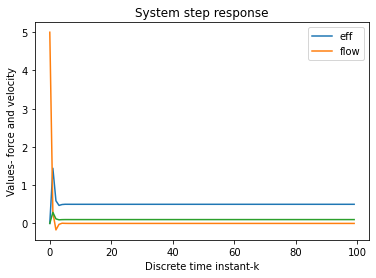

In [ ]:
plt.plot(output[0,:-1])
plt.plot(output[1,:-1])

plt.plot(output_pos)

plt.xlabel('Discrete time instant-k')
plt.ylabel('Values- force and velocity')
plt.title('System step response')
plt.legend (('eff', 'flow'))

### Numerical simulation (using SciPy signals)

This method seems unstable and for later concideration